1. Download 50 books from project Gutenberg.
2. Use nltk.pos_tag on each word in each book.
3. Count the number of pronouns for each book. (Females use more)
4. Count the number of nouns for each book. (Males use more)
5. Get a ratio of pronoun usage (pronouns / total word counts)
6. Get a ratio of noun usage (nouns / total word counts)
7. Create a column of author genders for each book.
8. Make a logistic regression model.
9. Cross validate it

In [286]:
import nltk
import pandas
import numpy as np

In [287]:
"""
total_word_count = []
total_noun_count = []
total_pronoun_count = []
for book_id in range(1661,1711):
    with open('pg' + str(book_id) + '.txt') as f:
        one_book = f.read().decode('utf-8',errors='ignore')
        words = [x for x in nltk.word_tokenize(one_book) if x not in ['.','?','!',''(',')',
        "'",'"',',','':','[',']','#','*','&']]
        total_word_count.append(len(words))
        sentences = nltk.sent_tokenize(one_book)
        noun = 0
        pronoun = 0
        for s in sentences:
            words = nltk.word_tokenize(s)
            tagged = nltk.pos_tag(words)
            for (word, part_of_speech) in tagged:
                if part_of_speech == 'NN':
                    noun+=1 
                if part_of_speech == 'NNP':
                    pronoun+=1
        total_noun_count.append(noun)
        total_pronoun_count.append(pronoun)
            
            
        

print 'Total words: ', total_word_count
print 'Total nouns: ', total_noun_count
print "Total pronouns: ", total_pronoun_count
"""

'\ntotal_word_count = []\ntotal_noun_count = []\ntotal_pronoun_count = []\nfor book_id in range(1661,1711):\n    with open(\'pg\' + str(book_id) + \'.txt\') as f:\n        one_book = f.read().decode(\'utf-8\',errors=\'ignore\')\n        words = [x for x in nltk.word_tokenize(one_book) if x not in [\'.\',\'?\',\'!\',\'\'(\',\')\',\n        "\'",\'"\',\',\',\'\':\',\'[\',\']\',\'#\',\'*\',\'&\']]\n        total_word_count.append(len(words))\n        sentences = nltk.sent_tokenize(one_book)\n        noun = 0\n        pronoun = 0\n        for s in sentences:\n            words = nltk.word_tokenize(s)\n            tagged = nltk.pos_tag(words)\n            for (word, part_of_speech) in tagged:\n                if part_of_speech == \'NN\':\n                    noun+=1 \n                if part_of_speech == \'NNP\':\n                    pronoun+=1\n        total_noun_count.append(noun)\n        total_pronoun_count.append(pronoun)\n            \n            \n        \n\nprint \'Total words: \'

In [306]:
total_word_count = [113774, 465084, 16729, 6787, 32350, 134474, 4784, 3147, 35365, 7321, 62851, 63682, 12645, 
                    37934, 125963, 22040, 9120, 15675, 74467, 25324, 10277, 13363, 34893, 77995, 81573, 105684, 
                    39798, 67822, 6216, 112281, 35156, 58556, 83281, 136361, 18981, 105846, 87865, 72246, 18616, 
                    26539, 111582, 20870, 105857, 51793, 65279, 62429, 146864, 32093, 98676, 7902]
total_noun_count = [14981, 96592, 2270, 970, 4326, 16726, 1060, 717, 5472, 933, 7624, 8238, 1527, 4983, 15925, 
                    2708, 1127, 2186, 10200, 3923, 1392, 1633, 5086, 10689, 10977, 13252, 4506, 10122, 852, 12663,
                    4036, 6129, 11552, 17064, 2527, 13432, 11184, 9326, 2424, 3269, 14369, 10518, 17383, 6408, 7776,
                    7869, 17441, 3933, 10764, 821]
total_pronoun_count = [4300, 101242, 2696, 785, 1685, 7896, 1955, 1363, 2313, 964, 3442, 1754, 888, 1903, 9669, 
                       919, 611, 1286, 4242, 1513, 627, 865, 1774, 4044, 4992, 5686, 1096, 2821, 561, 4932, 1856, 
                       2889, 4869, 5941, 1737, 5275, 6027, 3805, 1897, 2315, 6595, 2790, 4947, 2906, 2547, 3189, 5911, 
                       1738, 3455, 472]


In [307]:
books = pandas.Series(['The Adventures of Sherlock Holmes','The 1997 CIA World Factbook',"Webster's Seventh of March Speech, and the Secession Movement",
                     'Songs for Parents','Derrick Vaughan--Novelist','Lena Rivers',"My Aunt Margaret's Mirror",
                     "The Tapestried Chamber, and Death of the Laird's Jock",'The Human Drift',"The Small Catechism of Martin Luther",
                     "When a Man Marries","Gorgias","Lesser Hippias",'The Narrative of Sojourner Truth',
                     'New Forces in Old China','Alcibiades I',"Alcibiades II","And That's How It Was","Hiram The Young Farmer",
                      "At the Sign of the Cat and Racket",'Eryxias',"Menexenus",'Honorine','Me-Smith',"The Mystery of the Yellow Room",
                      "The Secret of the Night","Parmenides","The People of the Abyss","The Pivot of Civilization","Marie",
                      'Our guy','Us','Pip','A Poor Wise Man','The Adventures of Ann','Absolution','A Woman Named Smith',
                      "'Doc.' Gordon", 'A Cathedral Courtship',"A Flight with the Swallows Little Dorothy's Dream",
                       "The Age of Innocence","Agnes","Me and Nobbles","Bring Me His Ears","Affinities",
                       "The Adventurous Seven Their Hazardous Undertaking","Airy Fairy Lilian","Alexander's Bridge",
                       "Alice Adams","Alibi Ike"
                      ])
authors = pandas.Series(['Arthur Conan Doyle','United States','Herbert Darling Foster','John Farrar','Edna Lyall',
                        'Mary J. Holmes','Sir Walter Scott',"Sir Walter Scott",'Jack London','Robert E. Smith',
                        'Mary Roberts Rinehart','Benjamin Jowett','Benjamin Jowett','Olive Gilbert','Judson Brown',
                        'Benjamin Jowett',"Benjamin Jowett",'Ralph Sholto','Burbank L. Todd',
                        "Clara Bell",'Benjamin Jowett',"Benjamin Jowett",'Clara Bell',"Caroline Lockhart",
                        'Gaston Leroux','Gaston Leroux','Benjamin Jowett','Jack London',"Margaret Sanger",
                        'H. Rider Haggard','Mrs. E. E. Boyd','Mary Louisa S. Molesworth','Ian Hay','Mary Roberts Rinehart',
                         'Mary E. Wilkins Freeman','Clara Viebig','Marie Conway Oemler','Mary E. Wilkins-Freeman',
                         "Kate Douglas Wiggin","Emma Marshall","Edith Wharton","Minna Canth","Amy Le Feuvre",
                         "Clarence E. Mulford","Mary Roberts Rinehart","Bessie Marchant","Margaret Wolfe Hamilton",
                         "Willa Cather","Booth Tarkington","Ring Lardner"
                         
                        ])
table1 = pandas.DataFrame({'Book': books, 'Author': authors})
table1

,Author,Book
0,Arthur Conan Doyle,The Adventures of Sherlock Holmes
1,United States,The 1997 CIA World Factbook
2,Herbert Darling Foster,"Webster's Seventh of March Speech, and the Sec..."
3,John Farrar,Songs for Parents
4,Edna Lyall,Derrick Vaughan--Novelist
5,Mary J. Holmes,Lena Rivers
6,Sir Walter Scott,My Aunt Margaret's Mirror
7,Sir Walter Scott,"The Tapestried Chamber, and Death of the Laird..."
8,Jack London,The Human Drift
9,Robert E. Smith,The Small Catechism of Martin Luther


In [308]:
table2 = pandas.DataFrame({'Gender': ['Male','Male','Male','Male','Female',
                                      'Female','Male','Male','Male','Male',
                                      'Female','Male','Male','Female','Male',
                                     "Male",'Male','Male','Male','Female',
                                      'Male','Male','Female','Female','Male',
                                     "Male",'Male','Male','Male','Male',
                                     "Female",'Female','Male','Female',"Female",
                                     "Female","Female","Female","Female","Female",
                                     "Female","Female",'Female','Female','Female',
                                     "Female",'Female','Female','Male',"Male"]})
table2

,Gender
0,Male
1,Male
2,Male
3,Male
4,Female
5,Female
6,Male
7,Male
8,Male
9,Male


In [309]:
name_gender = table1.merge(table2, left_index=True, right_index=True)
name_gender

,Author,Book,Gender
0,Arthur Conan Doyle,The Adventures of Sherlock Holmes,Male
1,United States,The 1997 CIA World Factbook,Male
2,Herbert Darling Foster,"Webster's Seventh of March Speech, and the Sec...",Male
3,John Farrar,Songs for Parents,Male
4,Edna Lyall,Derrick Vaughan--Novelist,Female
5,Mary J. Holmes,Lena Rivers,Female
6,Sir Walter Scott,My Aunt Margaret's Mirror,Male
7,Sir Walter Scott,"The Tapestried Chamber, and Death of the Laird...",Male
8,Jack London,The Human Drift,Male
9,Robert E. Smith,The Small Catechism of Martin Luther,Male


In [310]:
table3 = pandas.DataFrame({'Total Pronouns' : total_pronoun_count,
             'Total nouns' : total_noun_count,
             'Total words': total_word_count,
            "Ratio of pronoun usage": 1.0* np.array(total_pronoun_count)/np.array(total_word_count),
            "Ratio of noun usage": 1.0*np.array(total_noun_count)/np.array(total_word_count)})
table3

,Ratio of noun usage,Ratio of pronoun usage,Total Pronouns,Total nouns,Total words
0,0.131673,0.037794,4300,14981,113774
1,0.207687,0.217685,101242,96592,465084
2,0.135693,0.161157,2696,2270,16729
3,0.142920,0.115662,785,970,6787
4,0.133725,0.052087,1685,4326,32350
5,0.124381,0.058718,7896,16726,134474
6,0.221572,0.408654,1955,1060,4784
7,0.227836,0.433111,1363,717,3147
8,0.154729,0.065404,2313,5472,35365
9,0.127442,0.131676,964,933,7321


In [311]:
combined = name_gender.merge(table3,left_index=True, right_index=True)
combined

,Author,Book,Gender,Ratio of noun usage,Ratio of pronoun usage,Total Pronouns,Total nouns,Total words
0,Arthur Conan Doyle,The Adventures of Sherlock Holmes,Male,0.131673,0.037794,4300,14981,113774
1,United States,The 1997 CIA World Factbook,Male,0.207687,0.217685,101242,96592,465084
2,Herbert Darling Foster,"Webster's Seventh of March Speech, and the Sec...",Male,0.135693,0.161157,2696,2270,16729
3,John Farrar,Songs for Parents,Male,0.142920,0.115662,785,970,6787
4,Edna Lyall,Derrick Vaughan--Novelist,Female,0.133725,0.052087,1685,4326,32350
5,Mary J. Holmes,Lena Rivers,Female,0.124381,0.058718,7896,16726,134474
6,Sir Walter Scott,My Aunt Margaret's Mirror,Male,0.221572,0.408654,1955,1060,4784
7,Sir Walter Scott,"The Tapestried Chamber, and Death of the Laird...",Male,0.227836,0.433111,1363,717,3147
8,Jack London,The Human Drift,Male,0.154729,0.065404,2313,5472,35365
9,Robert E. Smith,The Small Catechism of Martin Luther,Male,0.127442,0.131676,964,933,7321


In [312]:
combined['Sex']=np.where(combined.Gender == 'Male', 1, 0)
combined

,Author,Book,Gender,Ratio of noun usage,Ratio of pronoun usage,Total Pronouns,Total nouns,Total words,Sex
0,Arthur Conan Doyle,The Adventures of Sherlock Holmes,Male,0.131673,0.037794,4300,14981,113774,1
1,United States,The 1997 CIA World Factbook,Male,0.207687,0.217685,101242,96592,465084,1
2,Herbert Darling Foster,"Webster's Seventh of March Speech, and the Sec...",Male,0.135693,0.161157,2696,2270,16729,1
3,John Farrar,Songs for Parents,Male,0.142920,0.115662,785,970,6787,1
4,Edna Lyall,Derrick Vaughan--Novelist,Female,0.133725,0.052087,1685,4326,32350,0
5,Mary J. Holmes,Lena Rivers,Female,0.124381,0.058718,7896,16726,134474,0
6,Sir Walter Scott,My Aunt Margaret's Mirror,Male,0.221572,0.408654,1955,1060,4784,1
7,Sir Walter Scott,"The Tapestried Chamber, and Death of the Laird...",Male,0.227836,0.433111,1363,717,3147,1
8,Jack London,The Human Drift,Male,0.154729,0.065404,2313,5472,35365,1
9,Robert E. Smith,The Small Catechism of Martin Luther,Male,0.127442,0.131676,964,933,7321,1


In [313]:
%matplotlib inline
import matplotlib.pyplot as plt

In [314]:
X = combined[['Ratio of noun usage', 'Ratio of pronoun usage']]
y = combined.Sex

Figure(1200x400) [<matplotlib.axes._subplots.AxesSubplot object at 0x11f60f910>


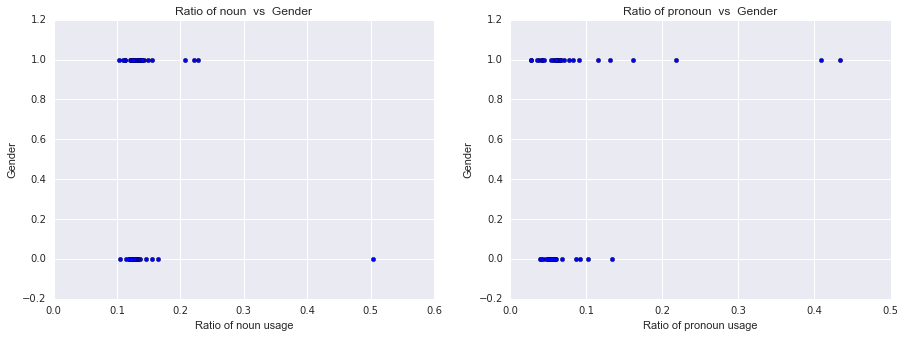

In [315]:
import matplotlib.pyplot
fig, axes = matplotlib.pyplot.subplots(1,2,figsize=(15,5))
print fig, axes
axes[0].scatter(combined['Ratio of noun usage'], y)
axes[1].scatter(combined['Ratio of pronoun usage'], y)
#plt.scatter(combined['Ratio of noun usage'], y, ax=axes[0])
#plt.scatter(combined['Ratio of pronoun usage'], y, ax=axes[1])
fig,axes
axes[0].set_xlabel('Ratio of noun usage')
axes[0].set_ylabel('Gender')
axes[1].set_xlabel('Ratio of pronoun usage')
axes[1].set_ylabel('Gender')


axes[0].set_title('Ratio of noun  vs  Gender')
axes[1].set_title('Ratio of pronoun  vs  Gender')


Ratio of Noun usage

In [322]:
men = combined[(combined.Gender == 'Male')]['Ratio of noun usage']
women = combined[(combined.Gender == 'Female')]['Ratio of noun usage']
men.mean(),women.mean()

(0.13963793191099524, 0.14458556276369852)

Ratio of Pronoun usage

In [323]:
men = combined[(combined.Gender == 'Male')]['Ratio of pronoun usage']
women = combined[(combined.Gender == 'Female')]['Ratio of pronoun usage']
men.mean(),women.mean()

(0.09963964953748297, 0.06065601295827167)

# Evaluating model

In [339]:
X = combined[['Ratio of noun usage', 'Ratio of pronoun usage']]
y = combined.Sex

Cross validation

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
logreg = LogisticRegression(C=1e9)
cross_val_score(logreg, X, y, cv=10)

array([ 0.5       ,  1.        ,  0.33333333,  0.66666667,  0.6       ,
        0.2       ,  0.25      ,  0.75      ,  0.5       ,  0.75      ])

Dummyclassifier

In [341]:
import sklearn.dummy
dummy_classifier = sklearn.dummy.DummyClassifier(strategy='most_frequent')
cross_val_score(dummy_classifier,X,y,cv=10)

array([ 0.5,  0.5,  0.5,  0.5,  0.6,  0.6,  0.5,  0.5,  0.5,  0.5])

In [342]:
logreg.fit(X,y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

This is the best I could ever hope for from this model.

In [343]:
logreg.score(X,y)

0.59999999999999998

In [344]:
logreg.coef_

array([[-11.4554319 ,  19.09085481]])

Males use more pronouns
Females use more nouns

Research say "Females use many more pronouns and males use many more noun specifiers"

# ROC

In [424]:
X = combined[['Ratio of noun usage', 'Ratio of pronoun usage']]
y = combined.Sex

In [425]:
from sklearn.cross_validation import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(
  X,
  y,
  test_size=0.33
)

In [426]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [427]:
y_pred = logreg.predict(X_test)

In [428]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [429]:
confusion_dataframe = pandas.DataFrame({
        'predictions': y_pred,
        'actuals': y_test
    })
true_positives = ((confusion_dataframe.predictions == confusion_dataframe.actuals)&(confusion_dataframe.predictions == True))
true_negatives = ((confusion_dataframe.predictions == confusion_dataframe.actuals)&(confusion_dataframe.predictions == False)
)
false_negatives = ((confusion_dataframe.actuals == True)&(confusion_dataframe.predictions == False)
)
false_positives = ((confusion_dataframe.actuals == False)&(confusion_dataframe.predictions == True)
)

print "True positives:", true_positives.sum()
print "True negatives: ", true_negatives.sum()
print 'False negatives: ', false_negatives.sum()
print 'False positives: ', false_positives.sum()

True positives: 8
True negatives:  0
False negatives:  0
False positives:  9


In [430]:
accuracy_score(y_test, y_pred) #(TP+TN)/(P+N)

0.47058823529411764

In [431]:
precision_score(y_test, y_pred) # TP/(TP+FP)

0.47058823529411764

In [432]:
recall_score(y_test, y_pred) # TP/(TP+FN)

1.0

In [433]:
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    #plt.title(curve_name + ' for house price > 200,000', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')


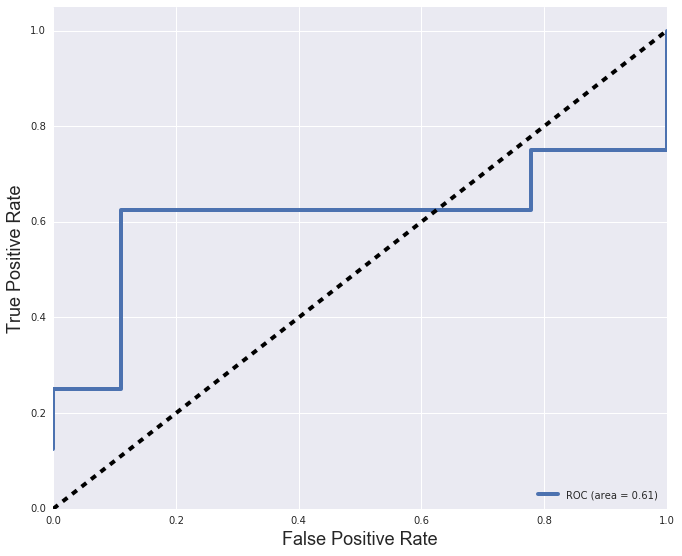

In [434]:
from sklearn.metrics import roc_curve, auc
y_score = logreg.decision_function(X_test)
plot_roc(y_test, y_score)

Take outliers out!!

In [258]:
combined

,Author,Book,Gender,Ratio of noun usage,Ratio of pronoun usage,Total Pronouns,Total nouns,Total words,Sex
0,Arthur Conan Doyle,The Adventures of Sherlock Holmes,Male,0.131673,0.037794,4300,14981,113774,1
1,United States,The 1997 CIA World Factbook,Male,0.207687,0.217685,101242,96592,465084,1
2,Herbert Darling Foster,"Webster's Seventh of March Speech, and the Sec...",Male,0.135693,0.161157,2696,2270,16729,1
3,John Farrar,Songs for Parents,Male,0.142920,0.115662,785,970,6787,1
4,Edna Lyall,Derrick Vaughan--Novelist,Female,0.133725,0.052087,1685,4326,32350,0
5,Mary J. Holmes,Lena Rivers,Female,0.124381,0.058718,7896,16726,134474,0
6,Sir Walter Scott,My Aunt Margaret's Mirror,Male,0.221572,0.408654,1955,1060,4784,1
7,Sir Walter Scott,"The Tapestried Chamber, and Death of the Laird...",Male,0.227836,0.433111,1363,717,3147,1
8,Jack London,The Human Drift,Male,0.154729,0.065404,2313,5472,35365,1
9,Robert E. Smith,The Small Catechism of Martin Luther,Male,0.127442,0.131676,964,933,7321,1


In [463]:
combined_without_outliers = combined[((combined['Ratio of noun usage']<0.16) & (combined['Ratio of pronoun usage']<0.11))].copy()
combined_without_outliers

,Author,Book,Gender,Ratio of noun usage,Ratio of pronoun usage,Total Pronouns,Total nouns,Total words,Sex
0,Arthur Conan Doyle,The Adventures of Sherlock Holmes,Male,0.131673,0.037794,4300,14981,113774,1
4,Edna Lyall,Derrick Vaughan--Novelist,Female,0.133725,0.052087,1685,4326,32350,0
5,Mary J. Holmes,Lena Rivers,Female,0.124381,0.058718,7896,16726,134474,0
8,Jack London,The Human Drift,Male,0.154729,0.065404,2313,5472,35365,1
10,Mary Roberts Rinehart,When a Man Marries,Female,0.121303,0.054764,3442,7624,62851,0
11,Benjamin Jowett,Gorgias,Male,0.129362,0.027543,1754,8238,63682,1
12,Benjamin Jowett,Lesser Hippias,Male,0.120759,0.070225,888,1527,12645,1
13,Olive Gilbert,The Narrative of Sojourner Truth,Female,0.131360,0.050166,1903,4983,37934,0
14,Judson Brown,New Forces in Old China,Male,0.126426,0.076761,9669,15925,125963,1
15,Benjamin Jowett,Alcibiades I,Male,0.122868,0.041697,919,2708,22040,1


In [464]:
X = combined_without_outliers[['Ratio of noun usage', 'Ratio of pronoun usage']]
y = combined_without_outliers.Sex

Figure(1200x400) [<matplotlib.axes._subplots.AxesSubplot object at 0x120dec9d0>


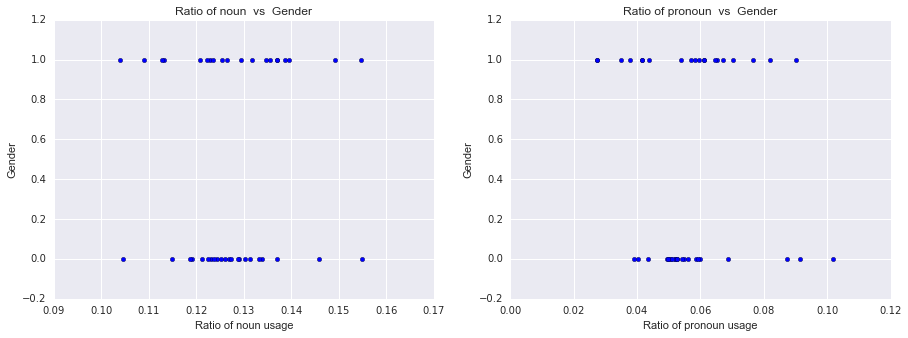

In [465]:
import matplotlib.pyplot
fig, axes = matplotlib.pyplot.subplots(1,2,figsize=(15,5))
print fig, axes
axes[0].scatter(combined_without_outliers['Ratio of noun usage'], y)
axes[1].scatter(combined_without_outliers['Ratio of pronoun usage'], y)
#plt.scatter(combined['Ratio of noun usage'], y, ax=axes[0])
#plt.scatter(combined['Ratio of pronoun usage'], y, ax=axes[1])
fig,axes
axes[0].set_xlabel('Ratio of noun usage')
axes[0].set_ylabel('Gender')
axes[1].set_xlabel('Ratio of pronoun usage')
axes[1].set_ylabel('Gender')


axes[0].set_title('Ratio of noun  vs  Gender')
axes[1].set_title('Ratio of pronoun  vs  Gender')


Ratio of Noun usage

In [466]:
men = combined_without_outliers[(combined_without_outliers.Gender == 'Male')]['Ratio of noun usage']
women = combined_without_outliers[(combined_without_outliers.Gender == 'Female')]['Ratio of noun usage']
men.mean(),women.mean()

(0.12837183351912368, 0.12735747310897202)

Ratio of Pronoun usage

In [467]:
men = combined_without_outliers[(combined_without_outliers.Gender == 'Male')]['Ratio of pronoun usage']
women = combined_without_outliers[(combined_without_outliers.Gender == 'Female')]['Ratio of pronoun usage']
men.mean(),women.mean()

(0.05613425836347077, 0.05796939725032717)

Cross Validation

In [468]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
logreg = LogisticRegression(C=1e9)
cross_val_score(logreg, X, y, cv=10)

array([ 0.8 ,  0.2 ,  0.5 ,  0.  ,  0.5 ,  0.5 ,  0.  ,  0.75,  0.25,  0.5 ])

In [469]:
import sklearn.dummy
dummy_classifier = sklearn.dummy.DummyClassifier(strategy='most_frequent')
cross_val_score(dummy_classifier,X,y,cv=10)

array([ 0.6,  0.6,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])

In [470]:
logreg.fit(X,y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [471]:
logreg.coef_

array([[ 10.95370354,  -8.82277932]])

Males are more likely to use noun
Females are more likely to use noun

In [472]:
logreg.score(X,y)

0.5714285714285714

# ROC

In [473]:
X = combined_without_outliers[['Ratio of noun usage', 'Ratio of pronoun usage']]
y = combined_without_outliers.Sex

In [474]:
from sklearn.cross_validation import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(
  X,
  y,
  test_size=0.33
)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [475]:
y_pred = logreg.predict(X_test)

In [476]:
confusion_dataframe = pandas.DataFrame({
        'predictions': y_pred,
        'actuals': y_test
    })
true_positives = ((confusion_dataframe.predictions == confusion_dataframe.actuals)&(confusion_dataframe.predictions == True))
true_negatives = ((confusion_dataframe.predictions == confusion_dataframe.actuals)&(confusion_dataframe.predictions == False)
)
false_negatives = ((confusion_dataframe.actuals == True)&(confusion_dataframe.predictions == False)
)
false_positives = ((confusion_dataframe.actuals == False)&(confusion_dataframe.predictions == True)
)

print "True positives:", true_positives.sum()
print "True negatives: ", true_negatives.sum()
print 'False negatives: ', false_negatives.sum()
print 'False positives: ', false_positives.sum()

True positives: 0
True negatives:  6
False negatives:  8
False positives:  0


In [477]:
accuracy_score(y_test, y_pred)

0.42857142857142855

In [478]:
precision_score(y_test, y_pred)

0.0

In [479]:
recall_score(y_test, y_pred)

0.0

In [480]:
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    #plt.title(curve_name + ' for house price > 200,000', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

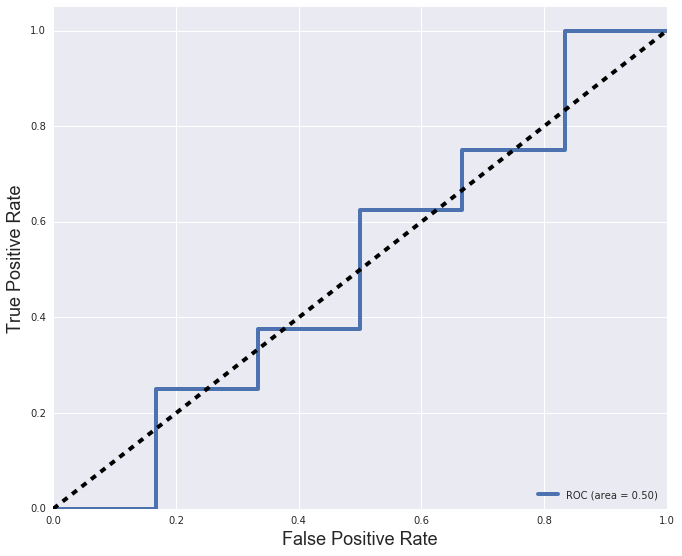

In [481]:
from sklearn.metrics import roc_curve, auc
y_score = logreg.decision_function(X_test)
plot_roc(y_test, y_score)